In [1]:
from source import *
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import warnings; warnings.filterwarnings('ignore')

# Data Science Case Study: Supplier Audit Results Prediction

by: Juan Betancourt

juan.beta98@gmail.com

# Contents

1. Brief Case Study Description

2. Data Exploration and Assumptions Formulation

3. Preprocessing the Data

4. Predictor Selection

5. Best Model Selection

6. Prediction for Audit Results

7. Business Recomendations

8. Model Maintenance

# 1.Brief Case Study Description


<br><div style="text-align: justify"> 
Managing suppliers is a critical aspect of the operational efficiency of any manufacturing company. Issues such as irregular lead times, backlogs, and incorrect orders can significantly disrupt manufacturing schedules, increase costs, and ultimately impact the service level provided to customers. In the context of this case study, our focus is on predicting the outcome of audits for a specific supplier and derivative combination.
</div> 

<br><div style="text-align: justify"> 
The process involves three stages: T1, T2, and T3. The goal is to forecast the most recent qualification status for a given supplier and derivative in their final audit stage. To achieve this objective, we have access to two datasets. The first dataset comprises essential information regarding the audit history of suppliers and the derivatives under their management. The second dataset provides diverse metrics related to the performance of suppliers.
</div> 

# 2.Data Exploration

## 2.1 Initial Exploration

The initial stage of data exploration involves obtaining a comprehensive overview of the datasets. This includes understanding the structure, content, and key characteristics of the available data.

### 2.1.1 _AuditHistory_ dataset

In [2]:
AuditHistory.head()

,SupplierId,RecentMonth,RecentTimeStamp,DerivativeName,DerivativeRegion,ProductionLine,T1Color,T2Color,T3Color,Result
0,f763999191217e9945b26d312d0902d5,2022-06,2022-06-30T10:01:20Z,3c4d48ad7d892bfe96a6df0fabe6deaa,Asia,LU,Green,Green,-,Green
1,377c62276b7dd74e406ac5de3c872110,2022-09,2022-09-28T07:00:46Z,2dc5fe1b4f8895bb1096f6470b7d8550,Europe,LG,Green,Green,Green,Green
2,20beb9edfc8536f19109a15b5ce1a845,2022-09,2022-09-28T07:00:46Z,9c491ff90cbfc2882aa1116944658240,Europe,LC,Green,Green,Green,Green
3,d0ae2fdd6681f6f99469af4f1ede3928,2022-10,2022-10-31T11:01:25Z,3724c242924ad7b7871634355d6ee63e,USA,LC,Green,Green,Green,Green
4,4668950356774590b25d92473b8756d9,2022-02,2022-02-28T11:01:17Z,99904aba55dd386296e5925bac70abe0,Europe,LU,Green,Red,-,Red


In [3]:
AuditHistory.describe()

,SupplierId,RecentMonth,RecentTimeStamp,DerivativeName,DerivativeRegion,ProductionLine,T1Color,T2Color,T3Color,Result
count,7690,7690,7690,7690,7547,7690,7690,7690,7690,7690
unique,818,9,9,75,5,4,3,4,4,3
top,4600f0a901054216cf0eecf2999f7eb2,2022-10,2022-10-31T11:01:25Z,9c491ff90cbfc2882aa1116944658240,Europe,LC,Green,Green,Green,Green
freq,36,989,989,760,3643,2737,7417,5499,4178,6797


In [4]:
AuditHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7690 entries, 0 to 7689
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SupplierId        7690 non-null   object
 1   RecentMonth       7690 non-null   object
 2   RecentTimeStamp   7690 non-null   object
 3   DerivativeName    7690 non-null   object
 4   DerivativeRegion  7547 non-null   object
 5   ProductionLine    7690 non-null   object
 6   T1Color           7690 non-null   object
 7   T2Color           7690 non-null   object
 8   T3Color           7690 non-null   object
 9   Result            7690 non-null   object
dtypes: object(10)
memory usage: 600.9+ KB


This dataset has 10 columns and 7690 entries. As there are various categorical features, here are some details:

- The dataset covers a time interval of 9 different months.
- A total of 818 suppliers, 75 derivatives, five (5) regions, and four (4) production lines are registered.

The only column with missing values is the _derivative region_ with 143 missing values.

### 2.1.2 _SupplierPerformance_ dataset

In [5]:
SupplierPerformance.head()

,Amount_WD_3M,Amount_WD_6M,Amount_WD_12M,Amount_Backlogs_3M,Amount_Backlogs_6M,Amount_Backlogs_12M,12_Month_LPKM,BadSupplierIndicator
SupplierId,,,,,,,,
68586a014afa6b343289dc017a95816e,0,0,0,0,0,0,5.0,NaN
075c37dc9fcacb082ef1bd4a3dae0c11,0,0,0,0,0,0,5.0,NaN
f9174001e40db58b4c1e21dd2de38536,0,0,0,0,0,0,5.0,NaN
557b239e840c24ed9592ed3ceb13326f,0,0,0,13,30,57,3.9,NaN
d74b6825c6a9283c834e713798bd0ccc,0,0,0,0,0,0,5.0,NaN


In [6]:
SupplierPerformance.describe(include='all')

,Amount_WD_3M,Amount_WD_6M,Amount_WD_12M,Amount_Backlogs_3M,Amount_Backlogs_6M,Amount_Backlogs_12M,12_Month_LPKM,BadSupplierIndicator
count,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5823.000000,5498.000000,332
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,332
mean,0.169329,0.425897,0.893697,2.150781,4.103555,7.386227,4.576155,NaN
std,0.810342,1.668909,3.228480,6.897040,12.144191,20.716048,0.578818,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.300000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.800000,NaN
75%,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,5.000000,NaN


In [7]:
SupplierPerformance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5823 entries, 68586a014afa6b343289dc017a95816e to e2d0d6a487351b44979611167ba19040
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_WD_3M          5823 non-null   int64  
 1   Amount_WD_6M          5823 non-null   int64  
 2   Amount_WD_12M         5823 non-null   int64  
 3   Amount_Backlogs_3M    5823 non-null   int64  
 4   Amount_Backlogs_6M    5823 non-null   int64  
 5   Amount_Backlogs_12M   5823 non-null   int64  
 6   12_Month_LPKM         5498 non-null   float64
 7   BadSupplierIndicator  332 non-null    object 
dtypes: float64(1), int64(6), object(1)
memory usage: 409.4+ KB


This dataset comprises 8 columns and 5823 entries. Here, most features, except for _BadSupplierIndicator_, consist of numeric data. Here are some details:

- Suppliers exhibit a significantly higher number of backlogs than wrong deliveries.

<br><div style="text-align: justify"> 
Two columns have missing data: *12_Month_LPKM* with 325 missing values and _BadSupplierIndicator_ with 5491 missing values. Upon closer inspection of the latter, we find that this column is encoded with 'bad' for suppliers with previous poor performance and nothing for all others. Therefore, one-hot encoding this column with 1 for poor performance and 0 for all others will resolve this issue.
</div> 

<br><div style="text-align: justify"> 
Another important detail is that this table has 5823 entries, each corresponding to a different supplier. In the _AuditHistory_ dataset, there are only 818 suppliers, indicating that most of the suppliers in this dataset lack audit data. These suppliers will be discarded, as there is not sufficient data to incorporate them into the model.
</div> 

## 2.2 Distribution Analysis

The next stage of dataset exploration involves conducting a distribution analysis. This analysis aims to provide insights into the distribution patterns of both numeric and categorical features.

### 2.2.1 _AuditHistory_ dataset

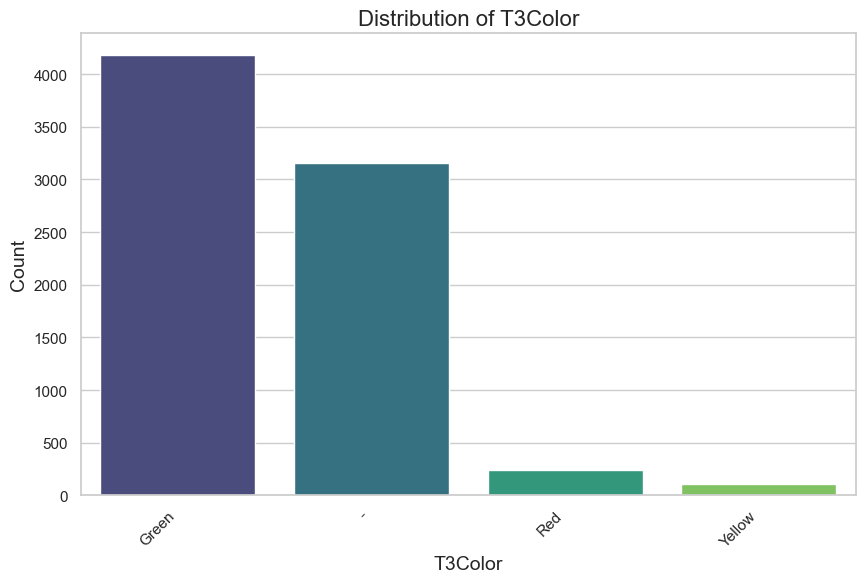

In [27]:
cols = list(AuditHistory.columns)[1:]
col_name = cols[7]
plot_categorical_distribution(col_name)

Some relevant insights from the distribution:

1. Observations are relatively uniformly distributed in the 9 months. However, the more recent the month more observations there are. 
2. Most Derivatives come from Europe, while South Africa contributes with very few units. 
3. The production line with more observations is LC with over 2500 observations while the production line with fewer observations is LG with around 1250 observations.
4. The phase T1 has mostly green observations with very few yellow and red qualifications. Phase T2 has also most green observations but contratry to T1 which had cero empty observations, in T2 there are a considerable amount of empty observations while very few yellow and red observations. Finally, T3 has higher green observations with a significantly higher empty observations with around 4200 and around 3100 observations, respectivly. Finally, the portion of yellow and red qualifications are still relatively low (but higher thatn T1 and T2).

### 2.2.2 _SupplierPerformance_ dataset

# 3.Preprocessing the Data

# 4.Predictor Selection

# 5.Best Model Selection

# 6.Prediction for Audit Results

# 7.Business Recomendations

# 8.Model Maintenance